<a href="https://colab.research.google.com/github/IvanOM-97/DPro-Exercises/blob/master/U30T1C59IrisBinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
CLASIFICACION BINARIA DEL IRIS
  CLASIFICACION DE FLORES IRIS
    En esta sección, aprenderemos el flujo para resolver un problema de clasificación utilizando el conjunto de datos iris.
    Este conjunto de datos  incluye información sobre tres tipos de flores Iris, con un total de 150 muestras.
    A continuación, se indican las especies de Iris que se analizarán:
        - Iris setosa – [Wikipedia]
        - Iris versicolor – [Wikipedia]
        - Iris virginica – [Wikipedia]

  El objetivo es predecir a qué especie pertenece cada flor a partir de sus características, lo que constituye un problema de clasificación.
  Aunque el conjunto de datos contiene 4 características, en este caso utilizaremos solo 2 para plantear el problema en dos dimensiones.

  METODOS QUE SE USARAN EN ESTA PRACTICA:
    Utilizando la librería scikit-learn, probaremos los siguientes métodos. La explicación detallada de cada uno se dará más adelante, pero primero observaremos brevemente qué tan efectivos son.
        - Método de los vecinos más cercanos (k-Nearest Neighbors)
        - Regresión logística
        - SVM (Máquinas de vectores de soporte)
        - Árboles de decisión
        - Bosque aleatorio (Random Forest)
'''

In [ ]:
'''
PROBLEMA 1 - PREPARACION
  En esta ocasión, se limitarán las características a solo dos para realizar la clasificación.
  Además, se reducirá el número de especies de Iris a dos, simplificando así el planteamiento del problema.
  Este tipo de configuración se denomina clasificación binaria, ya que el número de clases a predecir es solo dos.
  Es una característica distintiva frente a la clasificación multiclase, en la cual se clasifican múltiples categorías.
'''
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()

# Create a DataFrame with the data
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species (target) column using the actual names
df['species'] = iris.target

# Display the available species (0: setosa, 1: versicolor, 2: virginica)
print("Unique values in column 'species':", df['species'].unique())

# Filter the DataFrame to use only two species: 0 (setosa) and 1 (versicolor)
df_binary = df[df['species'].isin([1, 2])]

# Select only two features: for example, 'sepal length' and 'sepal width'
X = df_binary[['sepal length (cm)', 'petal length (cm)']]
y = df_binary['species']

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the data to confirm
print("Size of X_train:", X_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_test:", y_test.shape)

Unique values in column 'species': [0 1 2]
Size of X_train: (80, 2)
Size of y_train: (80,)
Size of X_test: (20, 2)
Size of y_test: (20,)


In [ ]:
'''
PROBLEMA 2 -SELECCION DE CARACTERISTICAS Y CATEGORIAS
  Existen 18 combinaciones posibles, pero en este caso se probará la siguiente combinación.
  Primero, se obtienen los datos utilizados en la Semana 3 y se extraen las características especificadas:
      - Categorías: versicolor y virginica
      - Características: sepal_length (longitud del sépalo) y petal_length (longitud del pétalo)

  Puntos a tener en cuenta
      En un análisis real, visualizar los resultados es muy útil.
      Sin embargo, en este caso se han reducido las características a solo dos para simplificar.
      En problemas de mayor dimensión, es posible visualizar los datos utilizando análisis de componentes principales (PCA).
'''
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()

# Create a DataFrame with the data
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species (target) column using the actual names
df['species'] = iris.target

# Display the available species (0: setosa, 1: versicolor, 2: virginica)
print("Unique values in column 'species':", df['species'].unique())

# Filter the DataFrame to use only two species
df_binary = df[df['species'].isin([1, 2])]

# Select only two features: for example, 'sepal length' and 'sepal width'
X = df_binary[['sepal length (cm)', 'petal length (cm)']]
y = df_binary['species']

# Display the shape of the data to confirm
print("Values in objetive column: ", df_binary['species'].unique())
print("Size of X_train:", X.shape)
print("Size of y_train:", y.shape)

Unique values in column 'species': [0 1 2]
Values in objetive column:  [1 2]
Size of X_train: (100, 2)
Size of y_train: (100,)


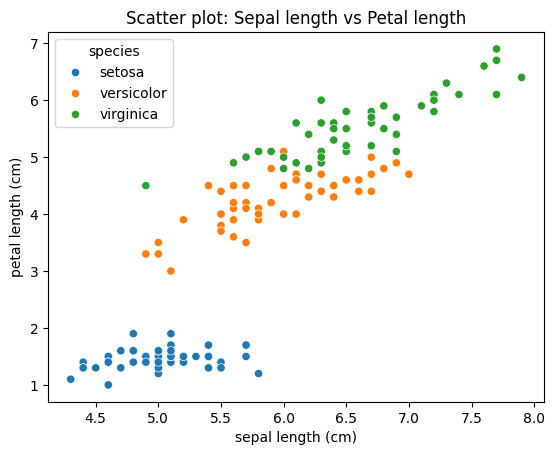

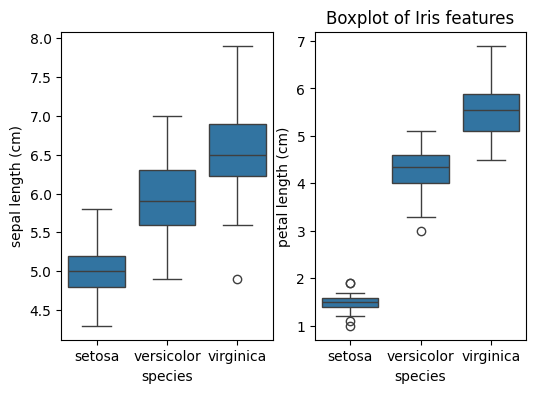

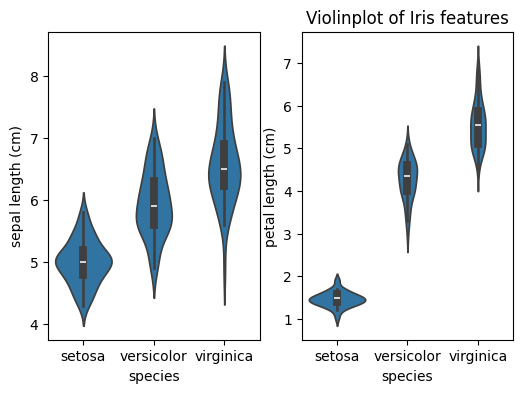

In [ ]:
'''
PROBLEMA 3 - ANALISIS DE LOS DATOS
  Primero, se realiza el análisis de los datos. Tal como se hizo en el ejercicio de la Semana 3, se revisa la matriz de diagramas de dispersión para observar las relaciones entre las características.
  Como repaso, se recomienda revisar los siguientes gráficos utilizando los datos seleccionados:
      - Diagrama de dispersión
      - Diagrama de caja (boxplot)
      - Diagrama de violín (violin plot)

  Nota adicional
  En base a los resultados del análisis de datos, se debe realizar el preprocesamiento necesario. Esto incluye:
      - Ingeniería de características
      - Imputación de valores faltantes
      - También es importante la detección de valores atípicos.

'''
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Scatterplot for two features

sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title('Scatter plot: Sepal length vs Petal length')
plt.show()

# Boxplot for all features
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='species', y='sepal length (cm)', orient='v')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='species', y='petal length (cm)', orient='v')
plt.title('Boxplot of Iris features')
plt.show()

# Violin diagram for all characteristics per species
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='species', y='sepal length (cm)', orient='v')
plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='species', y='petal length (cm)', orient='v')
plt.title('Violinplot of Iris features')
plt.show()

In [ ]:
'''
PROBLEMA 4 - PRETRATAMIENTO
  Se realiza una preparación adecuada de los datos. En el aprendizaje automático, la calidad de los datos es sumamente importante para obtener buenos resultados.
'''
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Feature engineering: basic example - create a new feature
df['sepal area'] = df['sepal length (cm)'] * df['sepal width (cm)']

# Detect outliers using the IQR (Interquartile Range) method
for column in df.select_dtypes(include='float64').columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    print(f"{column} has {len(outliers)} outliers")

# Display the DataFrame after basic preprocessing
print(df.head())

Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
sepal length (cm) has 0 outliers
sepal width (cm) has 4 outliers
petal length (cm) has 0 outliers
petal width (cm) has 0 outliers
sepal area has 2 outliers
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  sepal area  
0  setosa       17.85  
1  setosa       14.70  
2  setosa       15.04  
3  setosa       14.26  
4  setosa       18.00  


In [ ]:
'''
PROBLEMA 5 - PARTICIONADO DE LOS DATOS
  El conjunto de datos se dividirá en datos de entrenamiento y datos de validación.
  En este caso, se utilizará un 75 % para entrenamiento y un 25 % para validación.
    - Utiliza la función train_test_split de scikit-learn.
    - Avanza consultando la documentación oficial según sea necesario.

  Punto clave:
  Es necesario convertir los datos desde un DataFrame de Pandas a un ndarray de NumPy.
  Guarda las características en X y los valores correctos (etiquetas) en Y.
'''
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Load the Iris dataset
iris = load_iris()

# Load the dataset
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Filter only two classes: Iris-virginica and Iris-versicolor
binary_data = data[data['species'].isin([1, 2])]

# Select 2 features: 'sepal_length' and 'sepal_width'
X = binary_data[['petal length (cm)', 'sepal length (cm)']]
print(X.head())

#Select the labels (output): 'Iris-virginica', 'Iris-versicolor'
Y = binary_data['species']
print(Y.head())

# Split the data:use 75% of the data for training and 25% for validation
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=42)

# Step 7: Print the size of each set to check the result
print("Training samples:", len(X_train))
print("Validation samples:", len(X_val))

    petal length (cm)  sepal length (cm)
50                4.7                7.0
51                4.5                6.4
52                4.9                6.9
53                4.0                5.5
54                4.6                6.5
50    1
51    1
52    1
53    1
54    1
Name: species, dtype: int64
Training samples: 75
Validation samples: 25


In [ ]:
'''
PROBLEMA 6 - ESTANDARIZACION DE DATOS
  La estandarización de los datos puede mejorar la precisión del modelo de clasificación.
  Utiliza StandardScaler para realizar la estandarización.

  Atención:
  El método fit() debe aplicarse solo al conjunto de entrenamiento.
  Luego, se debe usar transform() tanto para el conjunto de entrenamiento como para el de validación.
  No uses los datos de validación para calcular la media ni la desviación estándar.
'''
# Import necessary libraries
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = load_iris()

# Create a DataFrame with the data
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Use only two features:'sepal length (cm)' and 'petal length (cm)'
X = data[['sepal length (cm)', 'petal length (cm)']]
y = data['species']

# For binary classification choose 0 = Iris setosa and 1 = Iris versicolor
binary_data = data[data['species'].isin([1, 2])]
X_binary = binary_data[['sepal length (cm)', 'petal length (cm)']]
y_binary = binary_data['species']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_binary, y_binary, test_size=0.25, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler only on the training data
scaler.fit(X_train)

# Transform both the training and validation data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Print to check results
print("Original training data (first 5 rows):")
print(X_train.head())

print("\nScaled training data (first 5 rows):")
print(X_train_scaled[:5])

Original training data (first 5 rows):
     sepal length (cm)  petal length (cm)
65                 6.7                4.4
90                 5.5                4.4
146                6.3                5.0
59                 5.2                3.9
122                7.7                6.7

Scaled training data (first 5 rows):
[[ 0.62124015 -0.65893772]
 [-1.15373171 -0.65893772]
 [ 0.02958286  0.05557306]
 [-1.59747467 -1.25436337]
 [ 2.10038336  2.08002027]]


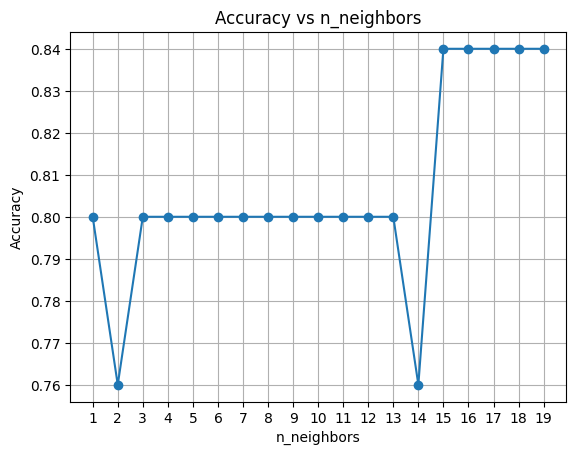

In [ ]:
'''
PROBLEMA 7 - APRENDIZAJE Y PREDICCION
  Utiliza el método de los vecinos más cercanos (k-NN) para el entrenamiento.
  Entrena el modelo usando los datos de entrenamiento y la clase KNeighborsClassifier.

  Después del entrenamiento, realiza predicciones sobre los datos de validación utilizando el método predict().
  Prueba diferentes valores para el parámetro n_neighbors para observar su efecto en el rendimiento.
'''
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()


# Create a DataFrame with the data
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Use only two features for simplicity
# We'll use: 'sepal length (cm)' and 'sepal width (cm)'
X = data[['sepal length (cm)', 'petal length (cm)']]
y = data['species']

# For binary classification, we will select only two species
# Let's choose 0 = Iris setosa and 1 = Iris versicolor
binary_data = data[data['species'].isin([1, 2])]
X_binary = binary_data[['sepal length (cm)', 'petal length (cm)']]
y_binary = binary_data['species']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_binary, y_binary, test_size=0.25, random_state=42)

# Standardize the data using StandardScaler
scaler = StandardScaler()

# Fit the scaler only on the training data
scaler.fit(X_train)

# Transform both training and validation data
X_train_std = scaler.transform(X_train)
X_val_std = scaler.transform(X_val)

# Try different values for n_neighbors
neighbors_range = range(1, 20)
accuracies = []

for k in neighbors_range:
    # Create the model with k neighbors
    model = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    model.fit(X_train_std, y_train)

    # Predict on validation data
    y_pred = model.predict(X_val_std)

    # Calculate accuracy
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)

    # Print accuracy for each value of k
    #print(f'n_neighbors = {k}, Accuracy = {acc:.2f}')

# Plot accuracy vs number of neighbors
plt.plot(neighbors_range, accuracies, marker='o')
plt.title('Accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.xticks(neighbors_range)
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
'''
PROBLEMA 8 - EVALUACION
  En problemas de clasificación binaria, se utilizan métricas como:
      - Precisión (accuracy)
      - Precisión positiva (precision)
      - Recall (sensibilidad o tasa de verdaderos positivos)
      - F1-score
  Estos valores se obtienen a partir de la matriz de confusión.
'''
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with the data
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Use only two features for simplicity
# We'll use: 'sepal length (cm)' and 'sepal width (cm)'
X = data[['sepal length (cm)', 'petal length (cm)']]
y = data['species']

# For binary classification, we will select only two species
# Let's choose 0 = Iris setosa and 1 = Iris versicolor
binary_data = data[data['species'].isin([1, 2])]
X_binary = binary_data[['sepal length (cm)', 'petal length (cm)']]
y_binary = binary_data['species']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_binary, y_binary, test_size=0.25, random_state=42)

# Create the k-NN classifier (with k = 3)
model = KNeighborsClassifier(n_neighbors=3)

# Train the model
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_val)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Print evaluation metrics: accuracy, precision, recall, f1-score
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Print accuracy score only
print("Accuracy:", accuracy_score(y_val, y_pred))

Confusion Matrix:
[[12  2]
 [ 3  8]]

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       0.80      0.73      0.76        11

    accuracy                           0.80        25
   macro avg       0.80      0.79      0.79        25
weighted avg       0.80      0.80      0.80        25

Accuracy: 0.8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


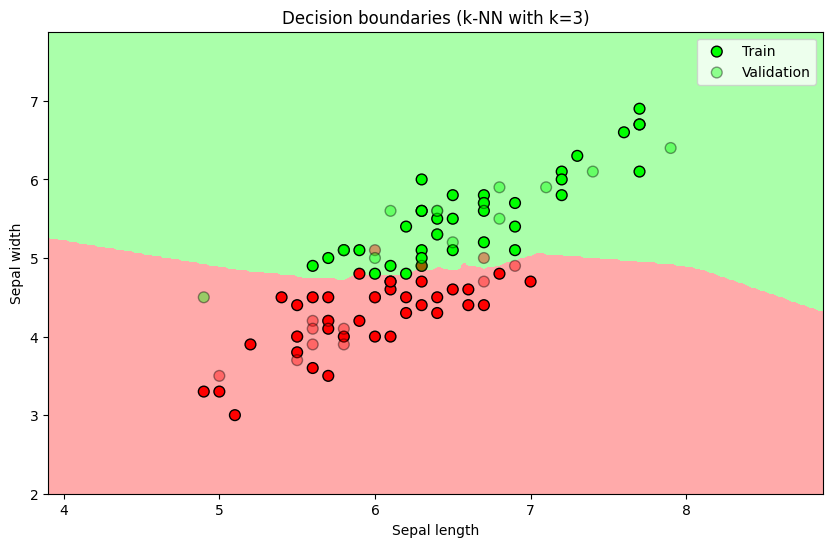

In [ ]:
'''
PROBLEMA 9 - VISUALIZACION
  Como parte del proceso de evaluación, se debe realizar una visualización.
  Utiliza funciones que permitan mostrar las regiones de decisión del modelo entrenado.

  Gracias a esta representación, podrás visualizar los resultados del aprendizaje sobre los datos de entrenamiento y verificar dónde ocurren las clasificaciones incorrectas.
'''
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the iris dataset
iris = load_iris()

# Create a DataFrame with the data
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Use only two features for simplicity
# We'll use: 'sepal length (cm)' and 'sepal width (cm)'
X = data[['sepal length (cm)', 'petal length (cm)']]
y = data['species']

# For binary classification, we will select only two species
# Let's choose 0 = Iris setosa and 1 = Iris versicolor
binary_data = data[data['species'].isin([1, 2])]
X_binary = binary_data[['sepal length (cm)', 'petal length (cm)']]
y_binary = binary_data['species']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_binary, y_binary, test_size=0.3, random_state=1)

# Train k-NN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Create a mesh to plot decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_binary.iloc[:, 0].min() - 1, X_binary.iloc[:, 0].max() + 1
y_min, y_max = X_binary.iloc[:, 1].min() - 1, X_binary.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the classifier output for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=60, label='Train')
plt.scatter(X_val.iloc[:, 0], X_val.iloc[:, 1], c=y_val, cmap=cmap_bold, edgecolor='k', s=60, alpha=0.4, label='Validation')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision boundaries (k-NN with k=3)')
plt.legend()
plt.show()



 Model: K-Nearest Neighbors
Accuracy: 0.8333333333333334
Confusion Matrix:
 [[16  1]
 [ 4  9]]
Classification Report:
               precision    recall  f1-score   support

   virginica       0.80      0.94      0.86        17
  versicolor       0.90      0.69      0.78        13

    accuracy                           0.83        30
   macro avg       0.85      0.82      0.82        30
weighted avg       0.84      0.83      0.83        30


 Model: Logistic Regression
Accuracy: 0.8666666666666667
Confusion Matrix:
 [[16  1]
 [ 3 10]]
Classification Report:
               precision    recall  f1-score   support

   virginica       0.84      0.94      0.89        17
  versicolor       0.91      0.77      0.83        13

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.86        30


 Model: Support Vector Machine
Accuracy: 0.8333333333333334
Confusion Matrix:
 [[16  1]
 [ 4  9]]
Classif

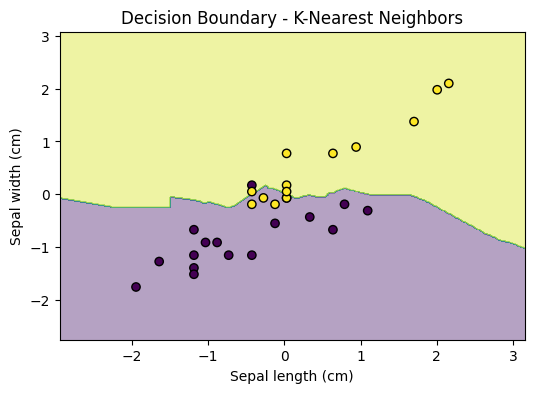

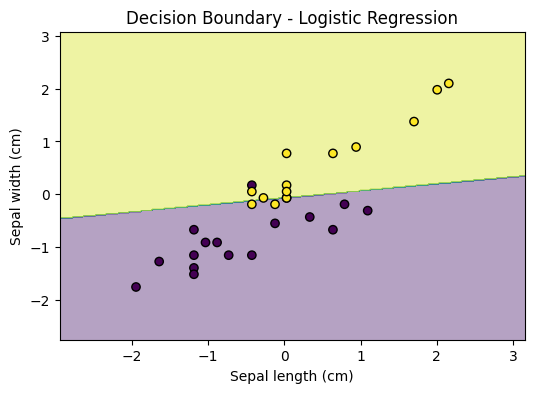

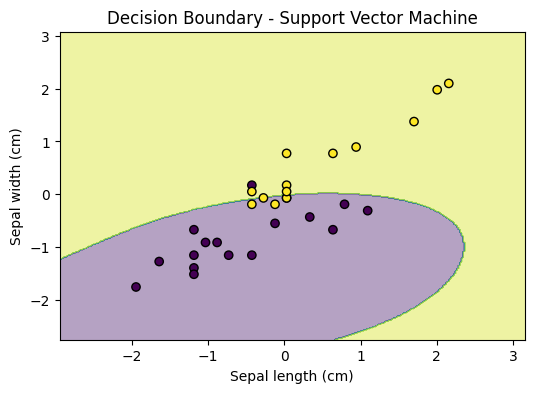

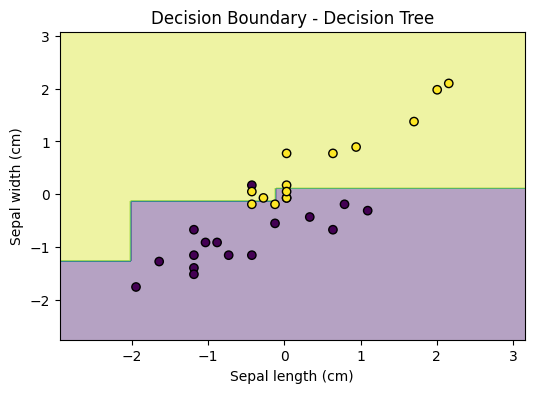

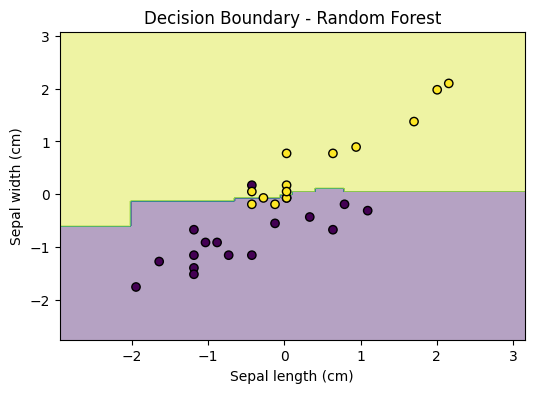

In [ ]:
'''
PROBLEMA 10 - APREDIENDO OTROS METODOS
  Prueba todo el flujo —desde el entrenamiento hasta la visualización— utilizando los siguientes métodos:
      Vecinos más cercanos (k-Nearest Neighbors)
      Regresión logística
      SVM (Máquinas de Vectores de Soporte)
      Árboles de decisión
      Bosque aleatorio (Random Forest)
  Avanza basándote en los ejemplos que ofrece la documentación oficial.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = load_iris()

# Convert to DataFrame for easier handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Filter only virginica and versicolor for binary classification
df_binary = df[df['species'].isin(['virginica', 'versicolor'])]

# Select only two features for visualization
X = df_binary[['sepal length (cm)', 'petal length (cm)']].values
y = df_binary['target'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a dictionary with all classifiers
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['virginica', 'versicolor']))

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.title(title)
    plt.show()

# Plot decision boundaries for all models
for name, model in models.items():
    plot_decision_boundary(model, X_test_scaled, y_test, f"Decision Boundary - {name}")



In [ ]:
'''
PROBLEMA 11 - COMPARACION CON Y SIN ESTANDARIZACION
  Compara los resultados con y sin estandarización previa para observar su impacto en el rendimiento.
  Reflexiona sobre la importancia de la estandarización en el preprocesamiento de datos.
'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()

# Convert to DataFrame for easier handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Filter only setosa and versicolor for binary classification
df_binary = df[df['species'].isin(['virginica', 'versicolor'])]

# Select only two features for visualization
X = df_binary[['sepal length (cm)', 'petal length (cm)']].values
y = df_binary['target'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

print("\n RESULTADOS SIN ESTANDARIZAR LOS DATOS:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.2f}")

# Now we apply standardization to the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

print("\n RESULTADOS CON ESTANDARIZACION DE DATOS:")
for name, model in models.items():
    model.fit(X_train_std, y_train)
    y_pred_std = model.predict(X_test_std)
    acc_std = accuracy_score(y_test, y_pred_std)
    print(f"{name}: {acc_std:.2f}")


 RESULTADOS SIN ESTANDARIZAR LOS DATOS:
KNN: 0.83
Logistic Regression: 0.87
SVM: 0.87
Decision Tree: 0.83
Random Forest: 0.80

 RESULTADOS CON ESTANDARIZACION DE DATOS:
KNN: 0.83
Logistic Regression: 0.87
SVM: 0.83
Decision Tree: 0.83
Random Forest: 0.80


In [ ]:
'''
PROBLEMA 12 - PRECISION DEL METODO UTILIZANDO TODAS LAS VARIABLES OBJETIVAS
  Hasta ahora se trabajó con clasificación binaria.
  Ahora, intenta una clasificación multiclase utilizando las tres especies de Iris y encuentra el método que ofrezca la mayor precisión.

  Nota adicional
  Para problemas multiclase, las métricas como precision, recall y F1-score requieren enfoques adecuados.
  Sin embargo, scikit-learn ya ofrece soluciones integradas para trabajar con clasificación multiclase, lo que facilita su implementación.
'''
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Function to load and prepare the Iris dataset
def load_iris_data():
    iris = datasets.load_iris()
    X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
    y = pd.Series(iris.target)  # Target labels
    return X, y

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict with test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    return accuracy

# Load the data
X, y = load_iris_data()

# Split the data into training and testing sets (70% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some models like SVM and Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of classifiers to evaluate
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Evaluate all models and store results
results = {}
for name, model in models.items():
    accuracy = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = accuracy

# Show results
print("Classification accuracy for each model:\n")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")


Classification accuracy for each model:

K-Nearest Neighbors: 1.00
Logistic Regression: 1.00
Support Vector Machine: 1.00
Decision Tree: 1.00
Random Forest: 1.00



 Model: K-Nearest Neighbors
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
   virginica       0.92      0.85      0.88        13
  versicolor       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45


 Model: Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
   virginica       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.0

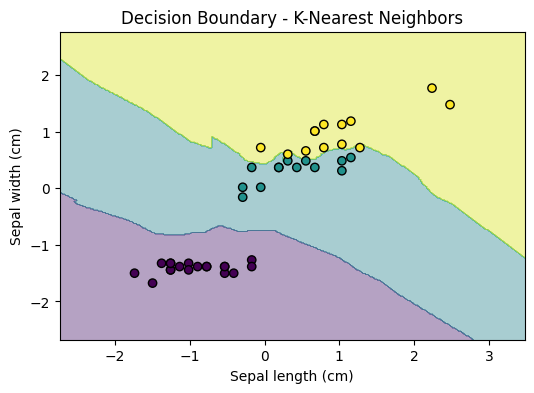

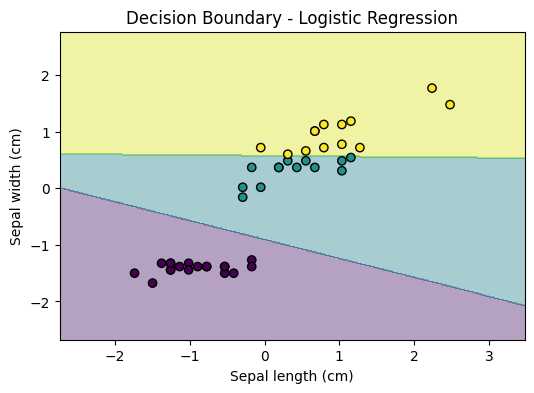

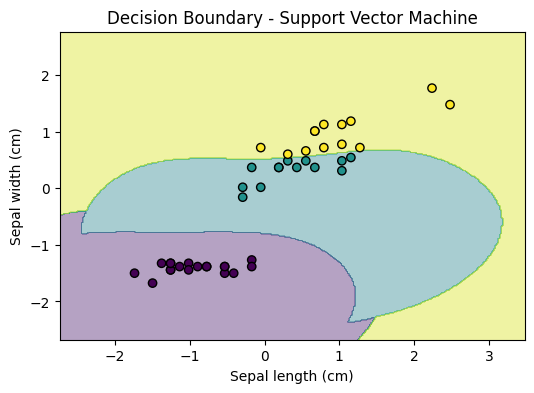

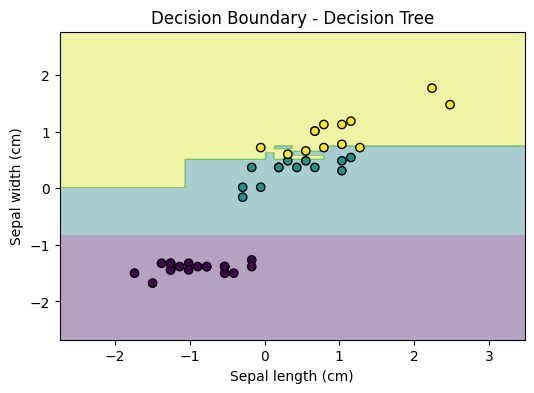

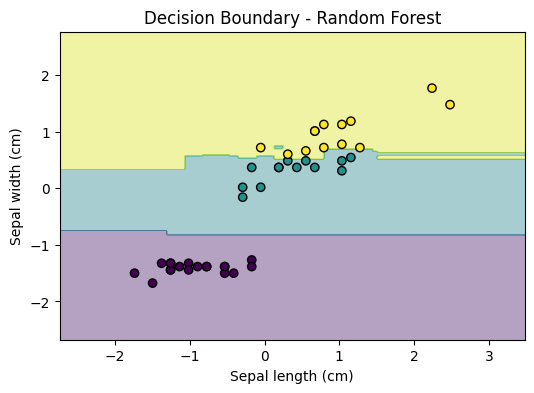

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = load_iris()

# Convert to DataFrame for easier handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Filter only virginica and versicolor for binary classification
df_binary = df[df['species'].isin(['setosa','virginica', 'versicolor'])]

# Select only two features for visualization
X = df_binary[['sepal length (cm)', 'petal length (cm)']].values
y = df_binary['target'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a dictionary with all classifiers
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(f"\n Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['setosa','virginica', 'versicolor']))

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.title(title)
    plt.show()

# Plot decision boundaries for all models
for name, model in models.items():
    plot_decision_boundary(model, X_test_scaled, y_test, f"Decision Boundary - {name}")